# Coursework 2 - Part 1


In [59]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt
import os;

In [60]:
###### Setting the Current path to read the files#################
curr_dir=os.getcwd();
cases_csv = curr_dir+'\\cases.csv';
ethnic_csv= curr_dir+'\\ethnic.csv';
population_csv=curr_dir+'\\population.csv';
medical_csv=curr_dir+'\\medical.csv';

df=pd.read_csv(cases_csv)


### 1.1: Reporting number of COVID-19 cases in each London local authority  (2 marks)
First, read the “cases.csv” dataset into a dataframe. Create a new dataframe where rows are the unique names of London local authorities and the columns are the total number of covid cases in each London local authority (include both count columns in the starting dataframe).

In [61]:
#Initial Validation of the data set
# Step1. Check the number of columns
# Step2. Check for any null values
# Step3. Check for Key Values 

# Step1. Check the number of columns
df.columns

Index(['MSOA11CD', 'MSOA11NM', 'Local authority', 'covid_19_deaths',
       'covid_19_deaths_per_thousand'],
      dtype='object')

In [62]:
#Step2. Check for any null values
# There are no null values in this

check_null_count= df.isnull().sum()
check_null_count
# There are no null values in any of the columns

MSOA11CD                        0
MSOA11NM                        0
Local authority                 0
covid_19_deaths                 0
covid_19_deaths_per_thousand    0
dtype: int64

In [63]:
df.count()
    #MSOA11CD                        983
    #MSOA11NM                        983
    #Local authority                 983
    #covid_19_deaths                 983
    #covid_19_deaths_per_thousand    983
    #dtype: int64

# Check which column has unique values present and looks like 'MSOA11CD' has unique values in the column
df['MSOA11CD'].nunique() #983
df['MSOA11NM'].nunique() #983
df['Local authority'].nunique() #33

33

In [64]:
df.head

#Initial data validation complete 
#Analysis - There are no null values in any of the columns
#MSOA11CD or MSOA11NM - Seems to be the unique column from in this data frame. 
#Since MSOA11NM is a description it is better to avoid putting unique values to this column
################################################################################################

<bound method NDFrame.head of       MSOA11CD                  MSOA11NM       Local authority  \
0    E02000001        City of London 001        City of London   
1    E02000002  Barking and Dagenham 001  Barking and Dagenham   
2    E02000003  Barking and Dagenham 002  Barking and Dagenham   
3    E02000004  Barking and Dagenham 003  Barking and Dagenham   
4    E02000005  Barking and Dagenham 004  Barking and Dagenham   
..         ...                       ...                   ...   
978  E02006927             Greenwich 034             Greenwich   
979  E02006928             Greenwich 035             Greenwich   
980  E02006929             Greenwich 036             Greenwich   
981  E02006930             Greenwich 037             Greenwich   
982  E02006931             Greenwich 038             Greenwich   

     covid_19_deaths  covid_19_deaths_per_thousand  
0                  3                      0.344590  
1                  2                      0.259067  
2                 

In [65]:
# Gives the unique values of London Borough  - np.sort(df['Local authority'].unique())
# Aggregates the value of the COVID deaths by Borough - df['covid_19_deaths'].groupby([df['Local authority']]).sum().sort_index(axis=0).to_numpy()])
# Giving the columns Names - columns=["Local authority","covid_death_per_borough"]
#Setting the Index of the new dataframe based on the Local Authority - index=np.sort(df['Local authority'].unique())

death_count_borough = pd.DataFrame(np.column_stack((np.sort(df['Local authority'].unique()), df['covid_19_deaths'].groupby([df['Local authority']]).sum().sort_index(axis=0).to_numpy())),columns=["Local authority","covid_death_borough"],index=np.sort(df['Local authority'].unique()))
death_count_borough


#Q1. This is combined result after merging the 2 dataset on London Borough Column
#The per thousand column wil be added down the line when population.csv is read

df = pd.merge(df,death_count_borough,on='Local authority')
df

,MSOA11CD,MSOA11NM,Local authority,covid_19_deaths,covid_19_deaths_per_thousand,covid_death_borough
0,E02000001,City of London 001,City of London,3,0.344590,3
1,E02000002,Barking and Dagenham 001,Barking and Dagenham,2,0.259067,103
2,E02000003,Barking and Dagenham 002,Barking and Dagenham,3,0.271469,103
3,E02000004,Barking and Dagenham 003,Barking and Dagenham,9,1.366535,103
4,E02000005,Barking and Dagenham 004,Barking and Dagenham,5,0.488806,103
...,...,...,...,...,...,...
978,E02000979,Westminster 020,Westminster,8,0.776021,120
979,E02000980,Westminster 021,Westminster,6,0.562641,120
980,E02000981,Westminster 022,Westminster,2,0.194005,120
981,E02000982,Westminster 023,Westminster,5,0.539084,120


### 1.2: Calculating percentage of COVID-19 cases in each London local authority (2 marks)
Read the “population.csv” dataset and calculate the percentage of covid cases in each city of London region according to the total population and add it as a new column to the datafame. Sort the dataframe according to this column.


In [66]:
###############################Reading the Population.csv ##############################################
pop=pd.read_csv(population_csv)

In [67]:
#Initial Validation of the data set
# Check the number of columns
# Check for any null values
# Check for Key Values and assign index to the key value

pop
pop.columns

Index(['MSOA11CD', 'MSOA11NM', 'Local authority', 'total_population_mid_2018',
       'over_70_prop'],
      dtype='object')

In [68]:
pop.count()
#MSOA11CD                     983
#MSOA11NM                     983
#Local authority              983
#total_population_mid_2018    983
#over_70_prop                 983
#dtype: int64

# Check which column has unique values present and looks like 'MSOA11CD' has unique values in the column
pop['MSOA11CD'].nunique() #983
pop['MSOA11NM'].nunique() #983
pop['Local authority'].nunique() #33

33

In [69]:
#Checking if there any null values in any of the columns
# There are no null values in this

check_null_count= pop.isnull().sum()
check_null_count
#There are no null values in this data set

MSOA11CD                     0
MSOA11NM                     0
Local authority              0
total_population_mid_2018    0
over_70_prop                 0
dtype: int64

In [70]:
#Validation of the Population data set is complete. 
#Initial analysis
# There are no null values in the data ser
# The columns MSOA11CD and MSOA11NM has unique values but since MSOA11NM is a description column we can use MSOA11CD for merging

pop.head

<bound method NDFrame.head of       MSOA11CD                  MSOA11NM       Local authority  \
0    E02000001        City of London 001        City of London   
1    E02000002  Barking and Dagenham 001  Barking and Dagenham   
2    E02000003  Barking and Dagenham 002  Barking and Dagenham   
3    E02000004  Barking and Dagenham 003  Barking and Dagenham   
4    E02000005  Barking and Dagenham 004  Barking and Dagenham   
..         ...                       ...                   ...   
978  E02006927             Greenwich 034             Greenwich   
979  E02006928             Greenwich 035             Greenwich   
980  E02006929             Greenwich 036             Greenwich   
981  E02006930             Greenwich 037             Greenwich   
982  E02006931             Greenwich 038             Greenwich   

     total_population_mid_2018  over_70_prop  
0                         8706      0.123593  
1                         7720      0.103886  
2                        11051      

In [71]:
# A new data frame created taking only necessary columns from the pop data dataframe - pop.iloc[:,2:4].groupby('Local authority').sum().sort_index(axis=0)
# Using the data frome from the previously calculated cases_death_per_borough - death_count_borough
# Merging the above 2 dataframe
#Creating a merged a data frame from previously calculated cases_death_borough


pop_merge = pd.merge(pop.iloc[:,2:4].groupby('Local authority').sum().sort_index(axis=0),death_count_borough.iloc[:,1:3],on=None,left_index=True,right_index=True)
pop_merge

,total_population_mid_2018,covid_death_borough
Local authority,,
Barking and Dagenham,211998,103
Barnet,392140,287
Bexley,247258,125
Brent,330795,304
Bromley,331096,152
Camden,262226,91
City of London,8706,3
Croydon,385346,252
Ealing,341982,239


In [72]:
#Total number of borough counts which was calculated earlier above during validation steps matches with the merged count hence it is merged without any issues 
#Also checking if there are any null values counts
pop_merge.count()
pop_merge.isnull().sum()
# There are no null values an hence we can proceed to calculating the percetange and merging with the original pop data set.

total_population_mid_2018    0
covid_death_borough          0
dtype: int64

In [73]:
pop_merge
pop_merge['per_covid_death_borough']=pop_merge['covid_death_borough']/ pop_merge['total_population_mid_2018']*100

In [74]:
## This is the column of covid cases per thousand for 1.b part
pop_merge['covid_19_death_per_thousand_borough']=pop_merge['covid_death_borough']/ pop_merge['total_population_mid_2018']*1000

In [75]:
pop_merge

,total_population_mid_2018,covid_death_borough,per_covid_death_borough,covid_19_death_per_thousand_borough
Local authority,,,,
Barking and Dagenham,211998,103,0.0485854,0.485854
Barnet,392140,287,0.0731881,0.731881
Bexley,247258,125,0.0505545,0.505545
Brent,330795,304,0.0918998,0.918998
Bromley,331096,152,0.0459081,0.459081
Camden,262226,91,0.0347029,0.347029
City of London,8706,3,0.034459,0.34459
Croydon,385346,252,0.0653958,0.653958
Ealing,341982,239,0.0698867,0.698867


In [76]:
#Merging it to the cases dataframe makes more sense as it already contains other calculated values and will further down the analysis
# we will be adding more columns to it.

df= pd.merge(df,pop_merge.iloc[:,2:5],left_on='Local authority',right_index=True)


In [77]:
# Here we are sorting the values in the descending order to find the highest number of cases 
#Sorting the values to the dataframe - Completeing Question 2

df.sort_values(by=['per_covid_death_borough'],ascending=False)

,MSOA11CD,MSOA11NM,Local authority,covid_19_deaths,covid_19_deaths_per_thousand,covid_death_borough,per_covid_death_borough,covid_19_death_per_thousand_borough
441,E02000440,Harrow 008,Harrow,3,0.313775,241,0.0963426,0.963426
449,E02000449,Harrow 017,Harrow,13,1.566265,241,0.0963426,0.963426
463,E02006882,Harrow 033,Harrow,9,0.632778,241,0.0963426,0.963426
462,E02006795,Harrow 032,Harrow,11,1.368840,241,0.0963426,0.963426
461,E02000463,Harrow 031,Harrow,3,0.359626,241,0.0963426,0.963426
...,...,...,...,...,...,...,...,...
602,E02000602,Kingston upon Thames 005,Kingston upon Thames,0,0.000000,57,0.0324842,0.324842
601,E02000601,Kingston upon Thames 004,Kingston upon Thames,0,0.000000,57,0.0324842,0.324842
600,E02000600,Kingston upon Thames 003,Kingston upon Thames,5,0.523396,57,0.0324842,0.324842
599,E02000599,Kingston upon Thames 002,Kingston upon Thames,8,0.946522,57,0.0324842,0.324842


In [78]:
#Merging the counts to the population dataframe

In [79]:
pop= pd.merge(pop,pop_merge.iloc[:,2:5],left_on='Local authority',right_index=True)

In [80]:
pop

,MSOA11CD,MSOA11NM,Local authority,total_population_mid_2018,over_70_prop,per_covid_death_borough,covid_19_death_per_thousand_borough
0,E02000001,City of London 001,City of London,8706,0.123593,0.034459,0.34459
1,E02000002,Barking and Dagenham 001,Barking and Dagenham,7720,0.103886,0.0485854,0.485854
2,E02000003,Barking and Dagenham 002,Barking and Dagenham,11051,0.085965,0.0485854,0.485854
3,E02000004,Barking and Dagenham 003,Barking and Dagenham,6586,0.124658,0.0485854,0.485854
4,E02000005,Barking and Dagenham 004,Barking and Dagenham,10229,0.066282,0.0485854,0.485854
...,...,...,...,...,...,...,...
946,E02000979,Westminster 020,Westminster,10309,0.090503,0.0469991,0.469991
947,E02000980,Westminster 021,Westminster,10664,0.104745,0.0469991,0.469991
948,E02000981,Westminster 022,Westminster,10309,0.078087,0.0469991,0.469991
949,E02000982,Westminster 023,Westminster,9275,0.100054,0.0469991,0.469991


In [81]:
pop.sort_values(by=['per_covid_death_borough'],ascending=False)

,MSOA11CD,MSOA11NM,Local authority,total_population_mid_2018,over_70_prop,per_covid_death_borough,covid_19_death_per_thousand_borough
424,E02000440,Harrow 008,Harrow,9561,0.108984,0.0963426,0.963426
432,E02000449,Harrow 017,Harrow,8300,0.096386,0.0963426,0.963426
973,E02006882,Harrow 033,Harrow,14223,0.119595,0.0963426,0.963426
963,E02006795,Harrow 032,Harrow,8036,0.096814,0.0963426,0.963426
444,E02000463,Harrow 031,Harrow,8342,0.080197,0.0963426,0.963426
...,...,...,...,...,...,...,...
581,E02000602,Kingston upon Thames 005,Kingston upon Thames,11592,0.058834,0.0324842,0.324842
580,E02000601,Kingston upon Thames 004,Kingston upon Thames,13059,0.059805,0.0324842,0.324842
579,E02000600,Kingston upon Thames 003,Kingston upon Thames,9553,0.086988,0.0324842,0.324842
578,E02000599,Kingston upon Thames 002,Kingston upon Thames,8452,0.133578,0.0324842,0.324842


### 1.3: Finding the largest and smallest population based on ethnicity group in each city of London (3 marks)

Read the “ethnic.csv” dataset and calculate the population of different ethnicity groups in each London borough using column “total\_population\_mid\_2018” from the first dataset “cases.csv”. Plot a bar chart to compare cases in each ethnicity group for each London local authority.

In [82]:
################# Ethnic.csv###############################
ethnic = pd.read_csv(ethnic_csv)

In [83]:
#Initial Validation of the data set
# Check the number of columns
# Check for any null values
# Check for Key Values and assign index to the key value

ethnic.columns

Index(['MSOA11CD', 'MSOA11NM', 'Local Authority', 'all_bame_prop',
       'all_black_prop', 'pakistani_or_bangladeshi_prop', 'all_indian_prop'],
      dtype='object')

In [84]:
ethnic.count()
#MSOA11CD                         983
#MSOA11NM                         983
#Local Authority                  983
#all_bame_prop                    983
#all_black_prop                   983
#pakistani_or_bangladeshi_prop    983
#all_indian_prop                  983
#dtype: int64


# Check which column has unique values present and looks like 'MSOA11CD' has unique values in the column
ethnic['MSOA11CD'].nunique() #983
ethnic['MSOA11NM'].nunique() #983
ethnic['Local Authority'].nunique() #33

33

In [85]:
#Checking if there any null values in any of the columns
# There are no null values in this

check_null_count= ethnic.isnull().sum()
check_null_count
#There are no null values in this data set

MSOA11CD                         0
MSOA11NM                         0
Local Authority                  0
all_bame_prop                    0
all_black_prop                   0
pakistani_or_bangladeshi_prop    0
all_indian_prop                  0
dtype: int64

In [86]:
#Validation of the Ethnic data set is complete. 
#Initial analysis
# There are no null values in the data ser
# The columns MSOA11CD and MSOA11NM has unique values but since MSOA11NM is a description column we can use MSOA11CD for merging

ethnic.head


<bound method NDFrame.head of       MSOA11CD                  MSOA11NM       Local Authority  all_bame_prop  \
0    E02000001        City of London 001        City of London       0.213695   
1    E02000002  Barking and Dagenham 001  Barking and Dagenham       0.350111   
2    E02000003  Barking and Dagenham 002  Barking and Dagenham       0.453858   
3    E02000004  Barking and Dagenham 003  Barking and Dagenham       0.190230   
4    E02000005  Barking and Dagenham 004  Barking and Dagenham       0.337304   
..         ...                       ...                   ...            ...   
978  E02006927             Greenwich 034             Greenwich       0.290559   
979  E02006928             Greenwich 035             Greenwich       0.414249   
980  E02006929             Greenwich 036             Greenwich       0.379706   
981  E02006930             Greenwich 037             Greenwich       0.220850   
982  E02006931             Greenwich 038             Greenwich       0.267472  

In [87]:
ethnic=ethnic.set_index(['MSOA11CD'])


In [88]:
ethnic
pop=pd.merge(pop,ethnic.iloc[:,2:8],left_on='MSOA11CD',right_index=True)

In [89]:
pop['all_black_pop']=round(pop['total_population_mid_2018']*pop['all_black_prop'],0)

In [90]:
pop['all_indian_pop']=round(pop['total_population_mid_2018']*pop['all_indian_prop'],0)

In [91]:
pop['all_pakistani_or_bangladeshi_pop']=round(pop['total_population_mid_2018']*pop['pakistani_or_bangladeshi_prop'],0)

In [92]:
#This will include the population that are not calculated in All black,All Indian and and All _pakistanior bangladeshi

pop['all_others']=round(pop['total_population_mid_2018']*pop['all_bame_prop'],0)-pop['all_pakistani_or_bangladeshi_pop']-pop['all_indian_pop']-pop['all_black_pop']

In [93]:
pop.isnull().sum()
#There are no null values so that merged data set looks good. Now proceed to create a chart dataframe for comparing the ethnicity 
#vs Covid cases

MSOA11CD                               0
MSOA11NM                               0
Local authority                        0
total_population_mid_2018              0
over_70_prop                           0
per_covid_death_borough                0
covid_19_death_per_thousand_borough    0
all_bame_prop                          0
all_black_prop                         0
pakistani_or_bangladeshi_prop          0
all_indian_prop                        0
all_black_pop                          0
all_indian_pop                         0
all_pakistani_or_bangladeshi_pop       0
all_others                             0
dtype: int64

In [94]:
#Creating a merged dataframe from the pop and death_pop_borough to create a chart datafram which will be used for comparison
chart_df=pop.reindex(columns=["Local authority","all_black_pop","all_indian_pop","all_pakistani_or_bangladeshi_pop","all_others"]).groupby(['Local authority']).sum()

In [95]:

# Checking if the count of chart has the same number of columns as initial and column counts are same. Next to proceed with the chart plotting
chart_df.count()

all_black_pop                       33
all_indian_pop                      33
all_pakistani_or_bangladeshi_pop    33
all_others                          33
dtype: int64

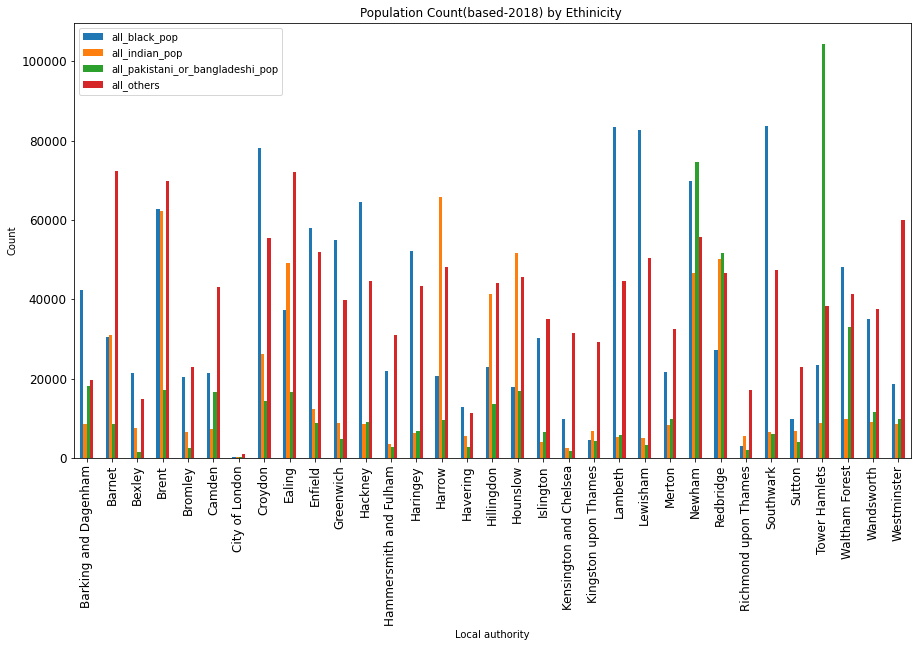

In [96]:
#Plotting the Chart

chart_df.plot.bar(figsize=(15,8),title='Population Count(based-2018) by Ethinicity ',fontsize=12)
plt.ylabel('Count')
plt.show()

### 1-4: Analysing the medical conditions of each region (3 marks)
Read the “medical.csv” dataset. Calculate total percentage of patients with “Hypertension”, “Obesity (18+)”, “Diabetes”, “Asthma”, and “Coronary heart disease” for each London local authority. For each medical condition, draw a boxplot of medical case frequencies for the 5 regions with the highest "total\_registered\_patient". Then, add a new column to the daraframe from section 1.2 to show the medical conditions with the highest number patients in each London borough.  

In [97]:
################### Medical.csv #####################################
med=pd.read_csv(medical_csv)



In [98]:
#Initial Validation of the data set
# Check the number of columns
# Check for any null values
# Check for Key Values and assign index to the key value

med
med.columns

Index(['MSOA11CD', 'MSOA11NM', 'Local authority', 'total_registered_patients',
       'Hypertension', 'Obesity (18+)', 'Diabetes', 'Asthma',
       'Coronary heart disease'],
      dtype='object')

In [99]:
med.count()
#MSOA11CD                     983
#MSOA11NM                     983
#Local authority              983
#total_registered_patients    983
#Hypertension                 983
#Obesity (18+)                983
#Diabetes                     983
#Asthma                       983
#Coronary heart disease       983
#dtype: int64


MSOA11CD                     983
MSOA11NM                     983
Local authority              983
total_registered_patients    983
Hypertension                 983
Obesity (18+)                983
Diabetes                     983
Asthma                       983
Coronary heart disease       983
dtype: int64

In [100]:
# Check which column has unique values present and looks like 'MSOA11CD' has unique values in the column
med['MSOA11CD'].nunique() #983
med['MSOA11NM'].nunique() #983
med['Local authority'].nunique() #33

33

In [101]:
#Checking if there any null values in any of the columns
# There are no null values in this

check_null_count= med.isnull().sum()
check_null_count
#There are no null values in this data set

MSOA11CD                     0
MSOA11NM                     0
Local authority              0
total_registered_patients    0
Hypertension                 0
Obesity (18+)                0
Diabetes                     0
Asthma                       0
Coronary heart disease       0
dtype: int64

In [102]:
#Validation of the Medical data set is complete. 
#Initial analysis
# There are no null values in the data ser
# The columns MSOA11CD and MSOA11NM has unique values but since MSOA11NM is a description column we can use MSOA11CD for merging

med.head

<bound method NDFrame.head of       MSOA11CD                  MSOA11NM       Local authority  \
0    E02000001        City of London 001        City of London   
1    E02000002  Barking and Dagenham 001  Barking and Dagenham   
2    E02000003  Barking and Dagenham 002  Barking and Dagenham   
3    E02000004  Barking and Dagenham 003  Barking and Dagenham   
4    E02000005  Barking and Dagenham 004  Barking and Dagenham   
..         ...                       ...                   ...   
978  E02006927             Greenwich 034             Greenwich   
979  E02006928             Greenwich 035             Greenwich   
980  E02006929             Greenwich 036             Greenwich   
981  E02006930             Greenwich 037             Greenwich   
982  E02006931             Greenwich 038             Greenwich   

     total_registered_patients  Hypertension  Obesity (18+)  Diabetes  Asthma  \
0                         8584          7.95           3.62      2.70    3.08   
1              

In [103]:
med['HT_Count']=round(med['Hypertension']*med['total_registered_patients']/100,0)

In [104]:
med['OB_Count']=round(med['Obesity (18+)']*med['total_registered_patients']/100,0)

In [105]:
med['DB_Count']=round(med['Diabetes']*med['total_registered_patients']/100,0)

In [106]:
med['AS_Count']=round(med['Asthma']*med['total_registered_patients']/100,0)

In [107]:
med['CH_Count']=round(med['Coronary heart disease']*med['total_registered_patients']/100,0)

In [108]:
#Calculating the total of each medical consition per borough
med_cases_borough=med.groupby(["Local authority"]).agg({'total_registered_patients':'sum','HT_Count':'sum','OB_Count':'sum','DB_Count':'sum','AS_Count':'sum','CH_Count':'sum'}).reset_index()

In [109]:
#Calculating the percentage total for each medical condition
med_cases_borough['Per_HT_Borough']=med_cases_borough['HT_Count']/med_cases_borough['total_registered_patients']*100
med_cases_borough['Per_OB_Borough']=med_cases_borough['OB_Count']/med_cases_borough['total_registered_patients']*100
med_cases_borough['Per_DB_Borough']=med_cases_borough['DB_Count']/med_cases_borough['total_registered_patients']*100
med_cases_borough['Per_AS_Borough']=med_cases_borough['AS_Count']/med_cases_borough['total_registered_patients']*100
med_cases_borough['Per_CH_Borough']=med_cases_borough['CH_Count']/med_cases_borough['total_registered_patients']*100

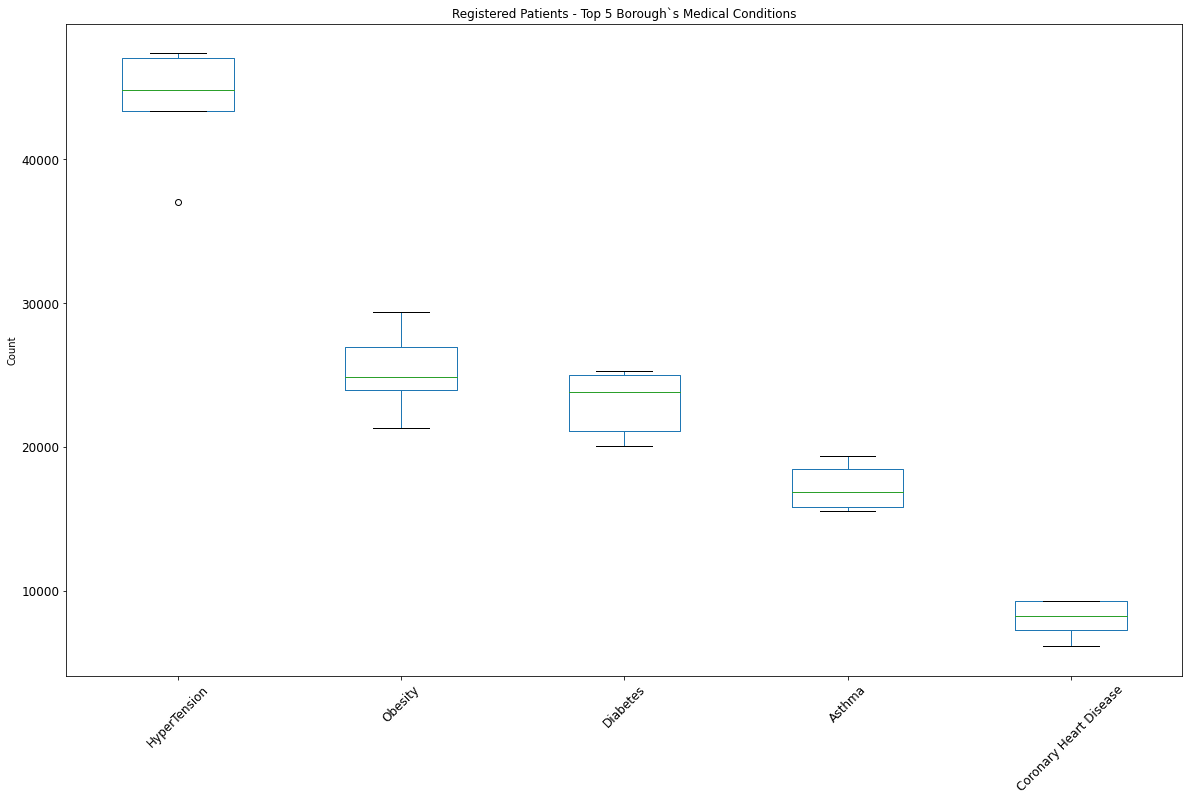

In [110]:
#PLotting Registered Patients - Top 5 

ax =med_cases_borough.nlargest(5,'total_registered_patients',keep='first').reindex(columns=["Local authority","HT_Count","OB_Count","DB_Count","AS_Count","CH_Count"]).plot.box(figsize=(20,12),title='Registered Patients - Top 5 Borough`s Medical Conditions',xticks=([1,2,3,4,5]),fontsize=12)
ax.set_xticklabels(['HyperTension','Obesity','Diabetes','Asthma','Coronary Heart Disease'], rotation=45)
plt.ylabel('Count')
plt.show()

In [111]:
#Getting the High Medical Condition for Each London Borough
med_cases_borough['High Medical Condition']=med_cases_borough.iloc[:,2:7].idxmax(axis='columns')

In [112]:
med_cases_borough['High Medical Condition'] = np.select(
    [
        med_cases_borough['High Medical Condition']=='HT_Count', 
        med_cases_borough['High Medical Condition']=='OB_Count', 
        med_cases_borough['High Medical Condition']=='DB_Count', 
        med_cases_borough['High Medical Condition']=='AS_Count', 
        med_cases_borough['High Medical Condition']=='CH_Count'
    ], 
    [
        'HyperTension', 
        'Obesity',
        'Diabetes',
        'Asthma',
        'Coronary Heart'
    ], 
    default='Unknown'
)

In [113]:
#Validating the values

med_cases_borough

,Local authority,total_registered_patients,HT_Count,OB_Count,DB_Count,AS_Count,CH_Count,Per_HT_Borough,Per_OB_Borough,Per_DB_Borough,Per_AS_Borough,Per_CH_Borough,High Medical Condition
0,Barking and Dagenham,235900,23230.0,19168.0,12613.0,9497.0,3689.0,9.847393,8.125477,5.346757,4.025858,1.563798,HyperTension
1,Barnet,425715,44790.0,21368.0,20062.0,16877.0,9357.0,10.521123,5.019320,4.712542,3.964389,2.197949,HyperTension
2,Bexley,253510,30696.0,18813.0,12445.0,10807.0,5855.0,12.108398,7.421009,4.909077,4.262948,2.309574,HyperTension
3,Brent,405143,43362.0,23978.0,24995.0,15611.0,7325.0,10.702888,5.918404,6.169427,3.853207,1.808004,HyperTension
4,Bromley,351070,43380.0,20408.0,14914.0,17070.0,8946.0,12.356510,5.813086,4.248156,4.862278,2.548210,HyperTension
5,Camden,273970,24827.0,10900.0,9091.0,10118.0,3713.0,9.061941,3.978538,3.318247,3.693105,1.355258,HyperTension
6,City of London,8584,682.0,311.0,232.0,264.0,129.0,7.945014,3.623020,2.702703,3.075489,1.502796,HyperTension
7,Croydon,427476,47021.0,24892.0,21159.0,18504.0,8314.0,10.999682,5.823017,4.949752,4.328664,1.944905,HyperTension
8,Ealing,428913,47378.0,26961.0,25274.0,19389.0,9349.0,11.046063,6.285890,5.892570,4.520497,2.179696,HyperTension
9,Enfield,360863,42482.0,25775.0,20044.0,15425.0,7492.0,11.772335,7.142600,5.554462,4.274475,2.076134,HyperTension


In [114]:
# Merging it with the population data as mentioned. Completing the tasks
pop =pd.merge(pop,med_cases_borough.reindex(columns=['Local authority','High Medical Condition']),left_on='Local authority',right_on='Local authority')
pop

,MSOA11CD,MSOA11NM,Local authority,total_population_mid_2018,over_70_prop,per_covid_death_borough,covid_19_death_per_thousand_borough,all_bame_prop,all_black_prop,pakistani_or_bangladeshi_prop,all_indian_prop,all_black_pop,all_indian_pop,all_pakistani_or_bangladeshi_pop,all_others,High Medical Condition
0,E02000001,City of London 001,City of London,8706,0.123593,0.034459,0.34459,0.213695,0.026169,0.033627,0.029288,228.0,255.0,293.0,1084.0,HyperTension
1,E02000002,Barking and Dagenham 001,Barking and Dagenham,7720,0.103886,0.0485854,0.485854,0.350111,0.167232,0.047970,0.039852,1291.0,308.0,370.0,734.0,HyperTension
2,E02000003,Barking and Dagenham 002,Barking and Dagenham,11051,0.085965,0.0485854,0.485854,0.453858,0.161075,0.104629,0.080836,1780.0,893.0,1156.0,1187.0,HyperTension
3,E02000004,Barking and Dagenham 003,Barking and Dagenham,6586,0.124658,0.0485854,0.485854,0.190230,0.104982,0.016338,0.007603,691.0,50.0,108.0,404.0,HyperTension
4,E02000005,Barking and Dagenham 004,Barking and Dagenham,10229,0.066282,0.0485854,0.485854,0.337304,0.168769,0.058748,0.035155,1726.0,360.0,601.0,763.0,HyperTension
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,E02000979,Westminster 020,Westminster,10309,0.090503,0.0469991,0.469991,0.263705,0.062369,0.016953,0.020418,643.0,210.0,175.0,1691.0,HyperTension
979,E02000980,Westminster 021,Westminster,10664,0.104745,0.0469991,0.469991,0.320590,0.078650,0.047674,0.024298,839.0,259.0,508.0,1813.0,HyperTension
980,E02000981,Westminster 022,Westminster,10309,0.078087,0.0469991,0.469991,0.208653,0.047714,0.018463,0.016238,492.0,167.0,190.0,1302.0,HyperTension
981,E02000982,Westminster 023,Westminster,9275,0.100054,0.0469991,0.469991,0.357160,0.086312,0.053975,0.016533,801.0,153.0,501.0,1858.0,HyperTension


In [115]:
#Final Validation on pop
pop.count()
#MSOA11CD                            983
#MSOA11NM                            983
#Local authority                     983
#total_population_mid_2018           983
#over_70_prop                        983
#all_black_prop                      983
#pakistani_or_bangladeshi_prop       983
#all_indian_prop                     983
#all_black_pop                       983
#all_indian_pop                      983
#all_pakistani_or_bangladeshi_pop    983
#High Medical Condition              983
#dtype: int64

MSOA11CD                               983
MSOA11NM                               983
Local authority                        983
total_population_mid_2018              983
over_70_prop                           983
per_covid_death_borough                983
covid_19_death_per_thousand_borough    983
all_bame_prop                          983
all_black_prop                         983
pakistani_or_bangladeshi_prop          983
all_indian_prop                        983
all_black_pop                          983
all_indian_pop                         983
all_pakistani_or_bangladeshi_pop       983
all_others                             983
High Medical Condition                 983
dtype: int64

In [116]:
pop.isnull().sum()

MSOA11CD                               0
MSOA11NM                               0
Local authority                        0
total_population_mid_2018              0
over_70_prop                           0
per_covid_death_borough                0
covid_19_death_per_thousand_borough    0
all_bame_prop                          0
all_black_prop                         0
pakistani_or_bangladeshi_prop          0
all_indian_prop                        0
all_black_pop                          0
all_indian_pop                         0
all_pakistani_or_bangladeshi_pop       0
all_others                             0
High Medical Condition                 0
dtype: int64

In [58]:
#Analysis completed the count of the final records remain intact and there are no null values in the newly inserted columns as well
#Hence concluding the Part 1.